In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
from numpy import concatenate
import yfinance as yf
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [3]:
BTC = yf.download(tickers='BTC-USD', period = '777d', interval = '1d')
ETH = yf.download(tickers='ETH-USD', period = '777d', interval = '1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,9352.393555,9368.476562,9202.353516,9267.561523,9267.561523,22700383839
2019-11-08,9265.368164,9272.759766,8775.534180,8804.880859,8804.880859,24333037836
2019-11-09,8809.468750,8891.818359,8793.163086,8813.582031,8813.582031,17578630606
2019-11-10,8812.489258,9103.826172,8806.162109,9055.526367,9055.526367,20587919881
2019-11-11,9056.917969,9081.279297,8700.608398,8757.788086,8757.788086,20265510765
...,...,...,...,...,...,...
2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,26098292690
2021-12-19,46853.867188,48089.664062,46502.953125,46707.015625,46707.015625,25154053861
2021-12-20,46707.062500,47401.718750,45579.808594,46880.277344,46880.277344,30961902129


In [5]:
BTC_graph = BTC.copy()
BTC_graph = BTC_graph.drop(BTC_graph.tail(16).index)

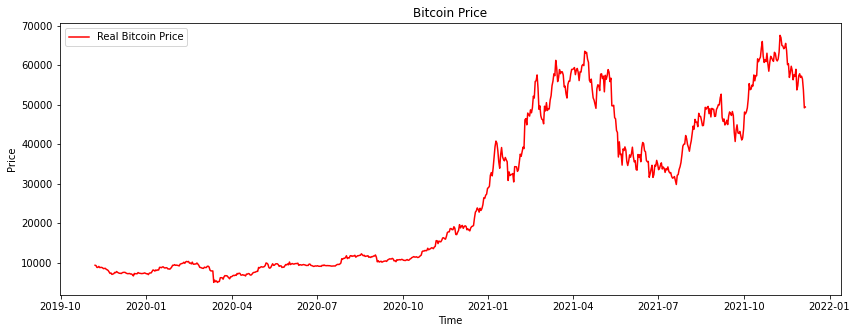

In [6]:
plt.figure(figsize=(14,5))
plt.plot(BTC_graph['Open'], color = 'red', label = 'Real Bitcoin Price')
plt.title('Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

###LSTM Multivariate Model

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [18]:
timestep = 3

epochs = 15
batch_size = 50
validation_split = 0.1
train_test_split_date = '2021-09-05'

In [9]:
reddit_data = pd.read_csv("group.csv")
reddit_data['Date']= pd.to_datetime(reddit_data['Date'])
reddit_data = reddit_data.drop(columns=['Unnamed: 0'])
reddit_data = reddit_data.rename(columns={"0":"Average_Reddit_Sentiment"})
#reddit_data.tail()

In [10]:
twitter_data = pd.read_csv("group2.csv")
twitter_data

,Unnamed: 0,Date,sentiment_value
0,0,2019-11-01,0.125874
1,1,2019-11-02,0.150935
2,2,2019-11-03,0.150765
3,3,2019-11-04,0.153959
4,4,2019-11-05,0.229067
...,...,...,...
772,772,2021-12-12,-0.039450
773,773,2021-12-13,-0.099832
774,774,2021-12-14,0.023364
775,775,2021-12-15,0.054805


In [11]:
twitter_data = pd.read_csv("group2.csv")
twitter_data['Date']= pd.to_datetime(twitter_data['Date'])
twitter_data = twitter_data.drop(columns=['Unnamed: 0'])
twitter_data = twitter_data.rename(columns={"sentiment_value":"Average_Twitter_Sentiment"})

In [12]:
data = BTC.copy()
data = data.reset_index()
data.drop(data.tail(16).index,inplace = True)
#data.tail()

In [13]:
data = pd.merge(data, reddit_data, how="left", on=["Date"])
data = data.fillna(method="ffill")

In [14]:
data = pd.merge(data, twitter_data, how="left", on=["Date"])
data = data.fillna(method="ffill")

### LSTM 

In [19]:
data_training = data[data['Date']<= train_test_split_date].copy()
data_test = data[data['Date']> train_test_split_date].copy()

#Drop Date and Adj Close columns
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)

#Scale data using MinMax Scaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

#Reshape data into (samples,timesteps,features)
X_train = [] 
Y_train = []
for i in range(timestep, training_data.shape[0]):
  X_train.append(training_data[i-timestep:i])
  Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

#Define LSTM Architecture
model = Sequential() 
model.add(LSTM(units = 32, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 128, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))

#Compile Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = epochs, batch_size =batch_size, validation_split=validation_split)

Epoch 1/15
12/12 [==============================] - 4s 56ms/step - loss: 0.1442 - val_loss: 0.2629
Epoch 2/15
12/12 [==============================] - 0s 18ms/step - loss: 0.0900 - val_loss: 0.0588
Epoch 3/15
12/12 [==============================] - 0s 17ms/step - loss: 0.0610 - val_loss: 0.0283
Epoch 4/15
12/12 [==============================] - 0s 15ms/step - loss: 0.0243 - val_loss: 0.0031
Epoch 5/15
12/12 [==============================] - 0s 15ms/step - loss: 0.0148 - val_loss: 0.0072
Epoch 6/15
12/12 [==============================] - 0s 16ms/step - loss: 0.0123 - val_loss: 0.0214
Epoch 7/15
12/12 [==============================] - 0s 16ms/step - loss: 0.0092 - val_loss: 0.0048
Epoch 8/15
12/12 [==============================] - 0s 15ms/step - loss: 0.0092 - val_loss: 0.0045
Epoch 9/15
12/12 [==============================] - 0s 15ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 10/15
12/12 [==============================] - 0s 15ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 11/

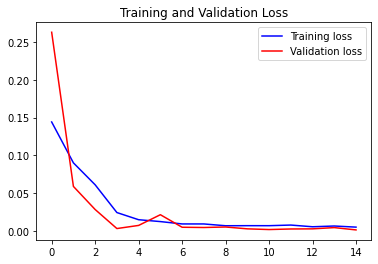

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [21]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume,Average_Reddit_Sentiment,Average_Twitter_Sentiment
0,33889.605469,33907.906250,32133.183594,32877.371094,29910396946,-0.369705,0.197484
1,32861.671875,34042.292969,32318.880859,33798.011719,27436021028,-0.353124,0.162669
2,33811.242188,34209.070312,33116.011719,33520.519531,22971873468,-0.341142,0.181378
3,33509.078125,34584.703125,33346.738281,34240.187500,20108729370,-0.286212,0.117202
4,34254.015625,34592.156250,32697.308594,33155.847656,24321499537,-0.164588,0.082976


In [22]:
inputs = scaler.transform(df) 
#inputs

In [23]:
X_test = []
Y_test = []
for i in range(timestep, inputs.shape[0]):
  X_test.append(inputs[i-timestep:i])
  Y_test.append(inputs[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape

(149, 3, 7)

In [24]:
Y_test

array([0.48711427, 0.49984364, 0.48055922, 0.47369635, 0.47547399,
       0.45861985, 0.45102871, 0.4533625 , 0.45791003, 0.44147621,
       0.42367069, 0.46370044, 0.46655558, 0.4885608 , 0.50046354,
       0.51915316, 0.5514834 , 0.5895406 , 0.59795236, 0.5984997 ,
       0.63556014, 0.62299271, 0.59644536, 0.58399073, 0.56749977,
       0.59366438, 0.61282585, 0.64643641, 0.67619727, 0.66282584,
       0.70535612, 0.69371684, 0.69332682, 0.67389475, 0.73149777,
       0.71929672, 0.71798596, 0.69947123, 0.67811645, 0.67905855,
       0.71291361, 0.75740953, 0.74958383, 0.75680464, 0.76142984,
       0.73007213, 0.75186566, 0.71584304, 0.75306087, 0.75030399,
       0.74899851, 0.71806079, 0.71934979, 0.74853707, 0.75674611,
       0.7690677 , 0.76784652, 0.79913681, 0.81437021, 0.7147017 ,
       0.69670788, 0.70733517, 0.68124506, 0.68700005, 0.70153472,
       0.68278657, 0.71931948, 0.73744807, 0.73081966, 0.72231886,
       0.73932686, 0.72211174, 0.64950261, 0.6096148 , 0.65886

In [25]:
Y_pred = model.predict(X_test)

In [30]:
scaler.scale_[0]

1.7087831654954492e-05

In [27]:
scale = 1/1.70878317e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
#Y_pred

In [28]:
Y_test


array([28506.49992485, 29251.43742289, 28122.89055086, 27721.26750505,
       27825.29680165, 26838.9725855 , 26394.73039917, 26531.30657069,
       26797.43352311, 25835.70696314, 24793.70696589, 27136.29485034,
       27303.3807874 , 28591.15226838, 29287.71476654, 30381.45304491,
       32273.45694617, 34500.60928405, 34992.87490775, 35024.90615767,
       37193.72646445, 36458.26552889, 34904.68350174, 34175.82412866,
       33210.7538187 , 34741.93740842, 35863.28896796, 37830.21865028,
       39571.85927068, 38789.347554  , 41278.26942244, 40597.12489298,
       40574.30067429, 39437.11317729, 42808.10926215, 42094.08973279,
       42017.38270174, 40933.87879834, 39684.17177039, 39739.30458274,
       41720.54285877, 44324.49597691, 43866.52722811, 44289.0975395 ,
       44559.76941379, 42724.67957487, 44000.06238401, 41891.97645207,
       44070.00769633, 43908.67175925, 43832.27332195, 42021.76160798,
       42097.19520153, 43805.26941577, 44285.67175826, 45006.74597511,
      

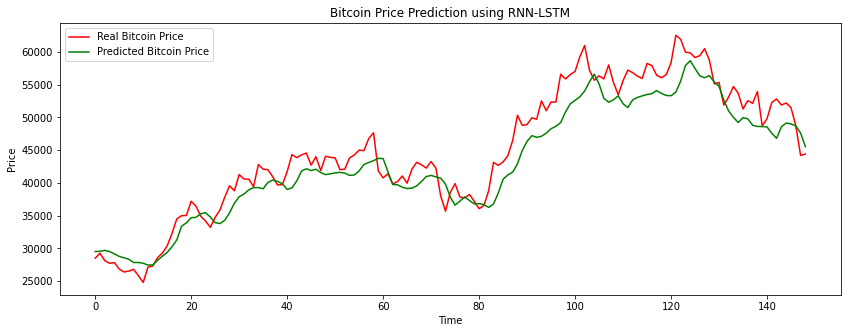

In [29]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
compare_df = pd.DataFrame()
compare_df['Test'] = Y_test
compare_df['Train'] = Y_pred.reshape(-1)

In [ ]:
compare_df.head()

,Test,Train
0,43206.328129,38834.925781
1,44172.382817,39746.304688
2,46484.085942,40125.492188
3,50336.046880,40937.839844
4,48799.566411,42538.566406


In [ ]:
com = compare_df.diff()

In [ ]:
com[com < 0] = 0
com[com > 0] = 1

In [ ]:
com['Correct_Prediction'] = np.where(com['Test']== com['Train'], True, False)
#com['Correct_Prediction'].value_counts()
#com.head()

In [ ]:
com1 = com[:18]
com1['Correct_Prediction'].value_counts()

In [ ]:
daily_hit_ratio = True_predictions_daily/(True_predictions_daily + False_predictions_daily) * 100
daily_hit_ratio

70.0

In [ ]:
weekly_hit_ratio = True_predictions_weekly/(True_predictions_weekly + False_predictions_weekly) * 100
weekly_hit_ratio

90.0